In [1]:
### 常规分析包
import os
import time
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, pearsonr, spearmanr
from scipy.spatial import distance
### 绘图包
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # 输出PDF文字可编辑
### 其他
import cloudpickle as pickle
import warnings
warnings.filterwarnings("ignore") # 报错提示
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

In [2]:
sns.color_palette(["#4a4a4a", "#00798c", "#d1495b", '#edae49', '#66a182'])

[(0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274)]

In [112]:
data = pd.read_csv('Results/M2. Emsemble_IBD.tsv', sep='\t', index_col=0)
data.shape
data.head(2)

(6600, 9)

,Type,Disease,NTree,NSample,Min_paired_ratio,Feature,TrainingSet,TestSet,AUC
0,Study2Study,IBD,101,3,0.0,overlap,27,36,0.598597
1,Study2Study,IBD,101,3,0.0,overlap,27,38,0.818844


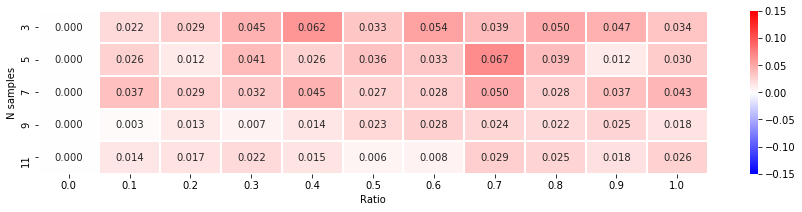

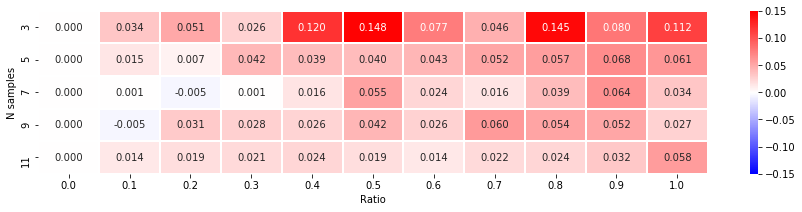

In [133]:
data = pd.read_csv('Results/M2. Emsemble_IBD.tsv', sep='\t', index_col=0)
nsamples = [3, 5, 7, 9, 11]
min_paireds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
s2s_res = pd.DataFrame(np.zeros([len(nsamples),len(min_paireds)]), index=nsamples, columns=min_paireds)
lodo_res = pd.DataFrame(np.zeros([len(nsamples),len(min_paireds)]), index=nsamples, columns=min_paireds)
for ns in nsamples:
    s2s = data.loc[(data['Type']=='Study2Study')&(data['NSample']==ns)&(data['Feature']=='overlap')&(data['Min_paired_ratio']==0.0), :]
    lodo = data.loc[(data['Type']=='LODO')&(data['NSample']==ns)&(data['Feature']=='overlap')&(data['Min_paired_ratio']==0.0), :]
    for mp in min_paireds:
        temp = data.loc[(data['Type']=='Study2Study')&(data['NSample']==ns)&(data['Feature']=='overlap')&(data['Min_paired_ratio']==mp), :]
        s2s[mp] = temp['AUC'].values - s2s['AUC'].values
        temp = data.loc[(data['Type']=='LODO')&(data['NSample']==ns)&(data['Feature']=='overlap')&(data['Min_paired_ratio']==mp), :]
        lodo[mp] = temp['AUC'].values - lodo['AUC'].values
    s2s_res.loc[ns, min_paireds] = s2s.mean()[min_paireds]
    lodo_res.loc[ns, min_paireds] = lodo.mean()[min_paireds]

fig, ax = plt.subplots(1, 1, figsize=(15, 3))
_ = sns.heatmap(s2s_res, annot=True, fmt=".3f", vmin=-0.15, vmax=0.15, cmap='bwr', linewidths=1)
_ = plt.ylim([len(nsamples), -0])
_ = plt.xlabel('Ratio')
_ = plt.ylabel('N samples')
_ = fig.savefig('Results/M2. Emsemble_IBD_study2study.pdf', dpi=300)
_ = plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 3))
_ = sns.heatmap(lodo_res, annot=True, fmt=".3f", vmin=-0.15, vmax=0.15, cmap='bwr', linewidths=1)
_ = plt.ylim([len(nsamples), -0])
_ = plt.xlabel('Ratio')
_ = plt.ylabel('N samples')
_ = fig.savefig('Results/M2. Emsemble_IBD_lodo.pdf', dpi=300)
_ = plt.show()

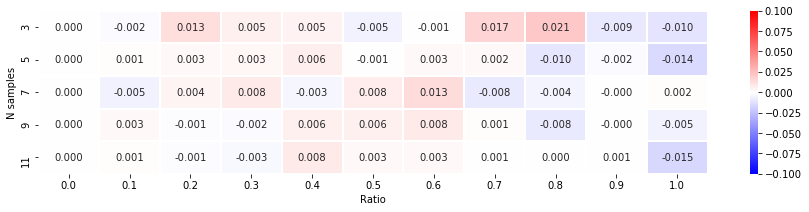

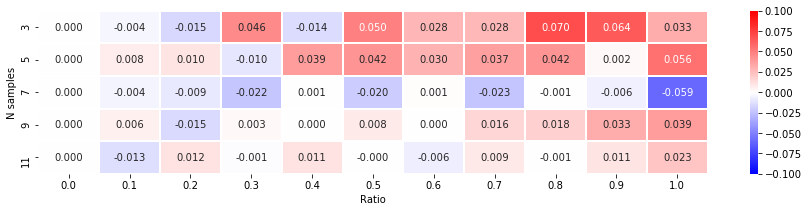

In [136]:
data = pd.read_csv('Results/M2. Emsemble_CRC.tsv', sep='\t', index_col=0)
nsamples = [3, 5, 7, 9, 11]
min_paireds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
s2s_res = pd.DataFrame(np.zeros([len(nsamples),len(min_paireds)]), index=nsamples, columns=min_paireds)
lodo_res = pd.DataFrame(np.zeros([len(nsamples),len(min_paireds)]), index=nsamples, columns=min_paireds)
for ns in nsamples:
    s2s = data.loc[(data['Type']=='Study2Study')&(data['NSample']==ns)&(data['Feature']=='overlap')&(data['Min_paired_ratio']==0.0), :]
    lodo = data.loc[(data['Type']=='LODO')&(data['NSample']==ns)&(data['Feature']=='overlap')&(data['Min_paired_ratio']==0.0), :]
    for mp in min_paireds:
        temp = data.loc[(data['Type']=='Study2Study')&(data['NSample']==ns)&(data['Feature']=='overlap')&(data['Min_paired_ratio']==mp), :]
        s2s[mp] = temp['AUC'].values - s2s['AUC'].values
        temp = data.loc[(data['Type']=='LODO')&(data['NSample']==ns)&(data['Feature']=='overlap')&(data['Min_paired_ratio']==mp), :]
        lodo[mp] = temp['AUC'].values - lodo['AUC'].values
    s2s_res.loc[ns, min_paireds] = s2s.mean()[min_paireds]
    lodo_res.loc[ns, min_paireds] = lodo.mean()[min_paireds]

fig, ax = plt.subplots(1, 1, figsize=(15, 3))
_ = sns.heatmap(s2s_res, annot=True, fmt=".3f", vmin=-0.10, vmax=0.10, cmap='bwr', linewidths=1)
_ = plt.ylim([len(nsamples), -0])
_ = plt.xlabel('Ratio')
_ = plt.ylabel('N samples')
_ = fig.savefig('Results/M2. Emsemble_CRC_study2study.pdf', dpi=300)
_ = plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 3))
_ = sns.heatmap(lodo_res, annot=True, fmt=".3f", vmin=-0.10, vmax=0.10, cmap='bwr', linewidths=1)
_ = plt.ylim([len(nsamples), -0])
_ = plt.xlabel('Ratio')
_ = plt.ylabel('N samples')
_ = fig.savefig('Results/M2. Emsemble_CRC_lodo.pdf', dpi=300)
_ = plt.show()

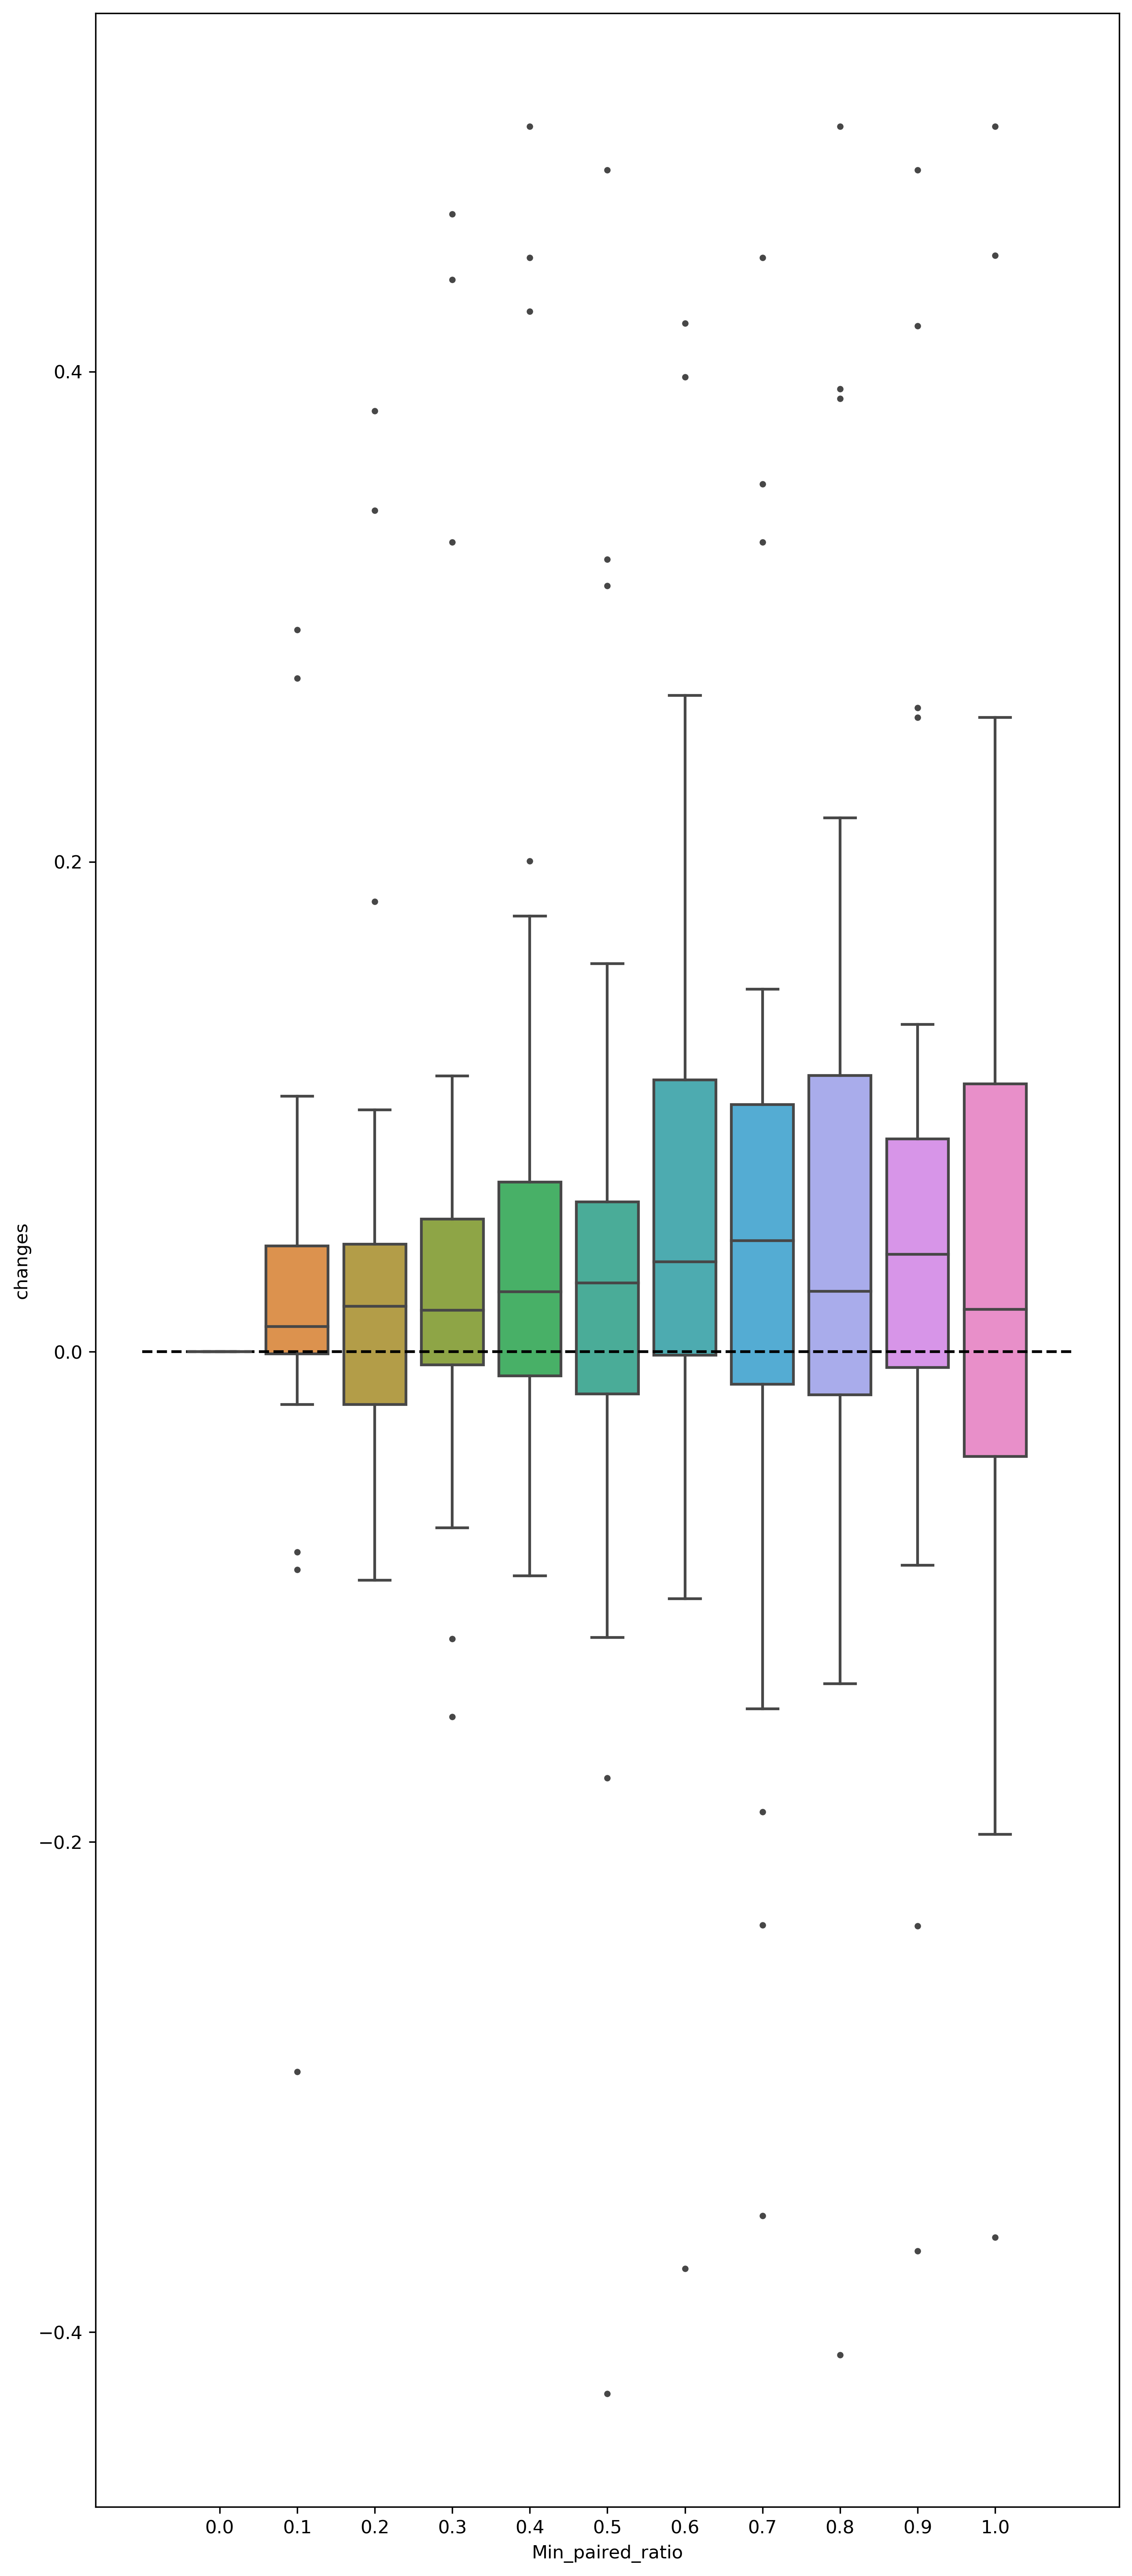

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 25), dpi=300)

temp = data.loc[(data['NSample']==3)&(data['Feature']=='overlap')&(data['Type']=='Study2Study'), :]
#temp['datasets'] = temp['TrainingSet'] + temp['TestSet']

_ = sns.boxplot(data=temp, x="Min_paired_ratio", y="changes", flierprops={"marker": "."},)
#_ = sns.lineplot(data=temp, x="Min_paired_ratio", y="changes", )
#_ = sns.swarmplot(data=temp, x="Min_paired_ratio", y="changes", color='k')
_ = plt.hlines(y=0, xmin=-1, xmax=11, ls='--')
#_ = plt.hlines(y=0.67, xmin=-1, xmax=11, ls='--')
#_ = plt.hlines(y=0.69, xmin=-1, xmax=11, ls='--')
#_ = plt.hlines(y=0.72, xmin=-1, xmax=11, ls='--')
#_ = plt.hlines(y=0.72, xmin=-1, xmax=11, ls='--')

#_ = sns.lineplot(data=temp, x="Min_paired_ratio", y="AUC", hue="datasets")
#for dataset in set(temp['datasets']):
#    temp2 = temp.loc[temp['datasets']==dataset, :]
#    _ = plt.plot(temp2['Min_paired_ratio']*10, temp2['AUC'])
#    #break

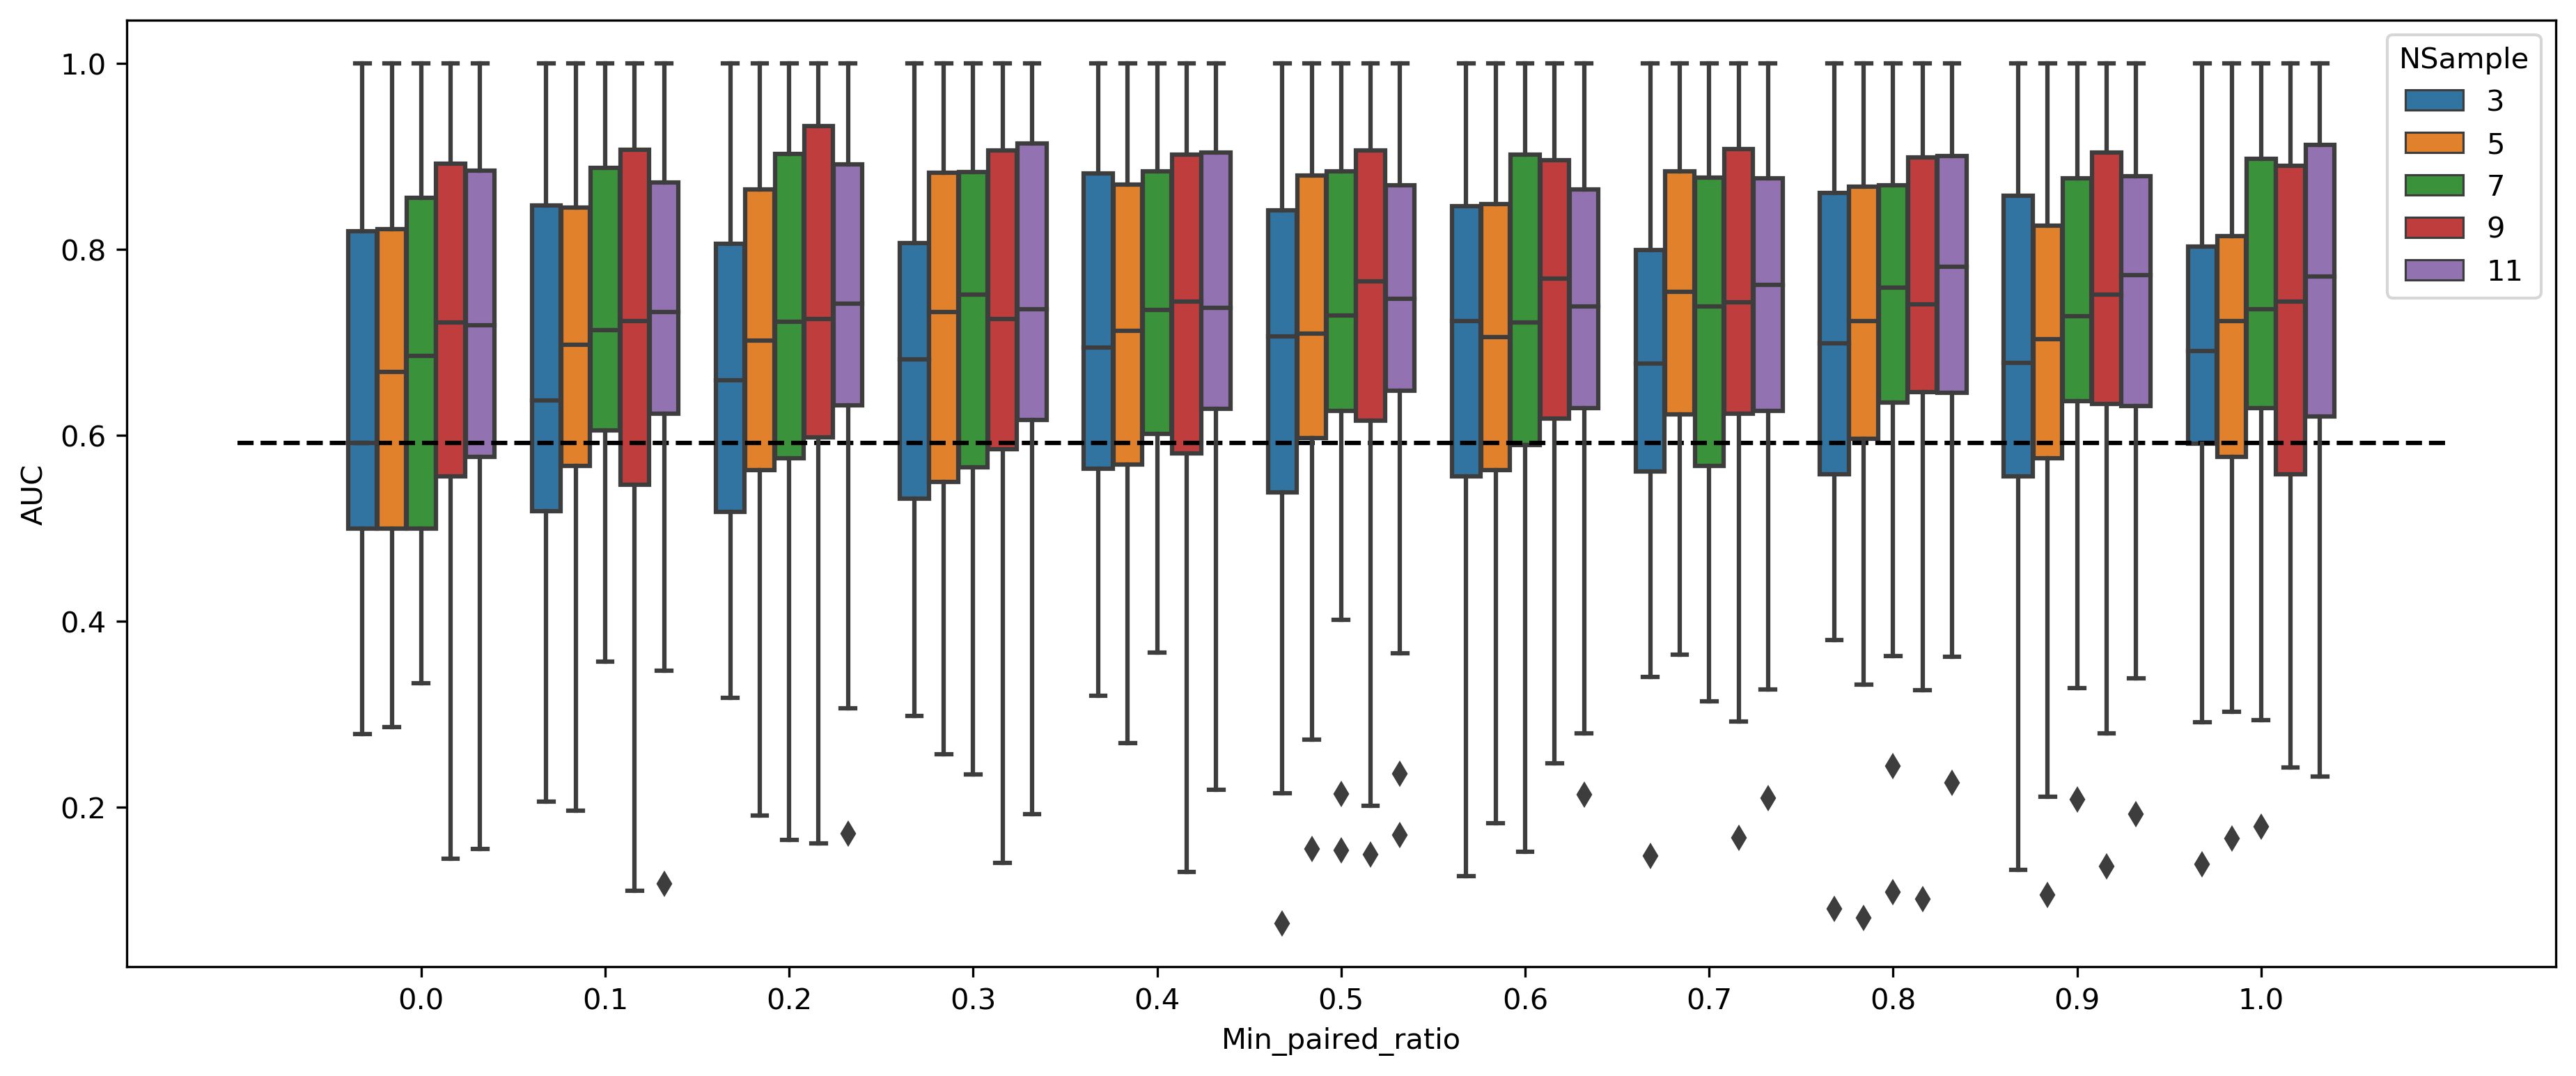

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6), dpi=300)

temp = data.loc[(data['NSample']==3)&(data['Feature']=='overlap'), :]
#temp['datasets'] = temp['TrainingSet'] + temp['TestSet']

_ = sns.boxplot(data=temp, x="Min_paired_ratio", y="AUC", hue='NSample')
#_ = sns.swarmplot(data=temp, x="Min_paired_ratio", y="AUC", color='k')
_ = plt.hlines(y=0.592, xmin=-1, xmax=11, ls='--')
#_ = plt.hlines(y=0.67, xmin=-1, xmax=11, ls='--')
#_ = plt.hlines(y=0.69, xmin=-1, xmax=11, ls='--')
#_ = plt.hlines(y=0.72, xmin=-1, xmax=11, ls='--')
#_ = plt.hlines(y=0.72, xmin=-1, xmax=11, ls='--')

#_ = sns.lineplot(data=temp, x="Min_paired_ratio", y="AUC", hue="datasets")
#for dataset in set(temp['datasets']):
#    temp2 = temp.loc[temp['datasets']==dataset, :]
#    _ = plt.plot(temp2['Min_paired_ratio']*10, temp2['AUC'])
#    #break

('###', 7, 'overlap', 0.0)

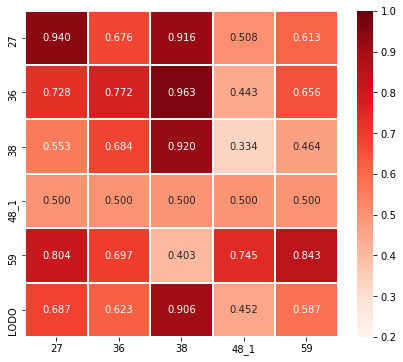

('###', 7, 'overlap', 0.1)

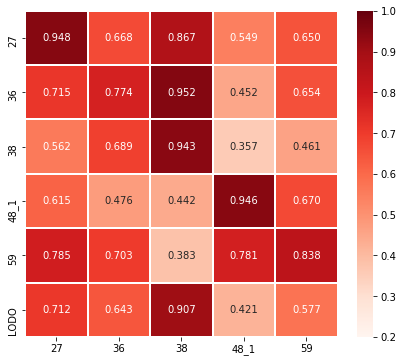

('###', 7, 'overlap', 0.2)

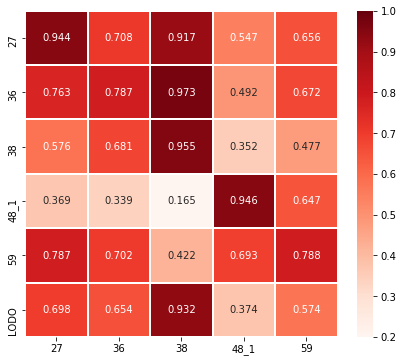

('###', 7, 'overlap', 0.3)

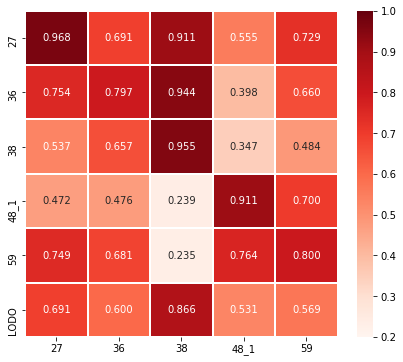

('###', 7, 'overlap', 0.4)

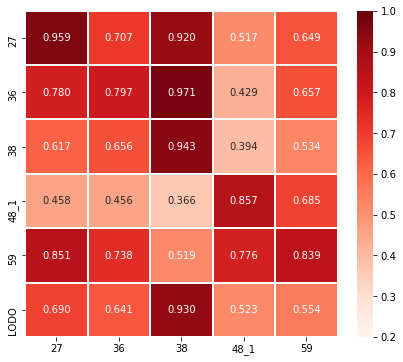

('###', 7, 'overlap', 0.5)

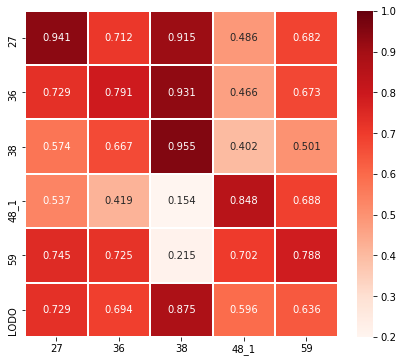

('###', 7, 'overlap', 0.6)

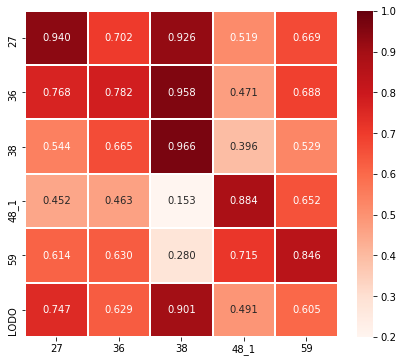

('###', 7, 'overlap', 0.7)

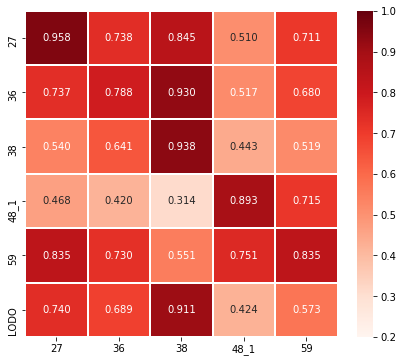

('###', 7, 'overlap', 0.8)

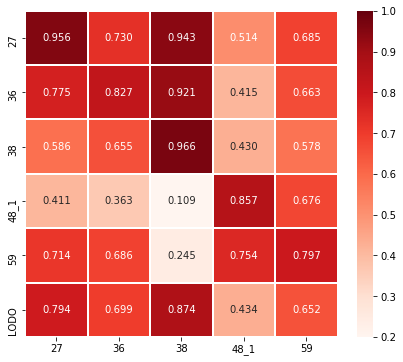

('###', 7, 'overlap', 0.9)

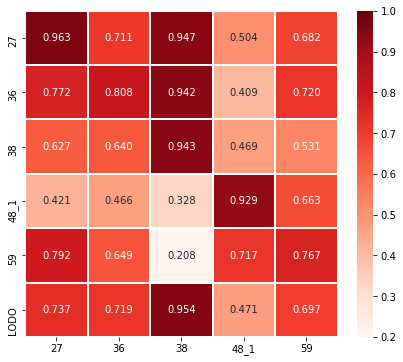

('###', 7, 'overlap', 1.0)

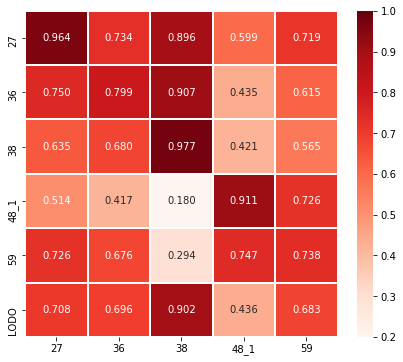

In [139]:
disease = 'IBD'
projects = ['27', '36', '38', '48_1', '59']
#projects = ['18_2', '26', '28_2', '81_2', '82', '83', '87', '91', '93_3', '97', '99_2']
min_paireds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
NSample = 7
Feature = 'overlap'

data = pd.read_csv('Results/M2. Emsemble_'+disease+'.tsv', sep='\t', index_col=0)
changes = []
s2s = data.loc[(data['Type']=='Study2Study')&(data['NSample']==NSample)&(data['Feature']==Feature)&(data['Min_paired_ratio']==0.0), :]
lodo = data.loc[(data['Type']=='LODO')&(data['NSample']==NSample)&(data['Feature']==Feature)&(data['Min_paired_ratio']==0.0), :]
for min_paired in min_paireds:
    temp = data.loc[(data['Type']=='Study2Study')&(data['NSample']==NSample)&(data['Feature']==Feature)&(data['Min_paired_ratio']==min_paired), :]
    s2s[min_paired] = temp['AUC'].values - s2s['AUC'].values
    matrix = pd.DataFrame(np.zeros([len(projects)+1, len(projects)]), index=projects+['LODO'], columns=projects)
    for i in temp.index:
        trainset = str(temp.loc[i, 'TrainingSet'])
        testset = str(temp.loc[i, 'TestSet'])
        auc = temp.loc[i, 'AUC']
        if 'train' in testset or 'valid' in testset:
            continue
        testset = testset.replace('_test', '') if '_test' in testset else testset
        matrix.loc[trainset, testset] = auc
    temp = data.loc[(data['Type']=='LODO')&(data['NSample']==NSample)&(data['Feature']==Feature)&(data['Min_paired_ratio']==min_paired), :]
    matrix.loc['LODO', :] = temp['AUC'].values
    lodo[min_paired] = temp['AUC'].values - lodo['AUC'].values
    
    '###', NSample, Feature, min_paired
    fig, ax = plt.subplots(1, 1, figsize=(7, 6))
    _ = sns.heatmap(matrix, annot=True, fmt=".3f", vmin=0.2, vmax=1.0, cmap='Reds', linewidths=1)
    _ = plt.ylim([len(projects)+1, -0])
    _ = fig.savefig('Results/M2. Emsemble_'+disease+'_matrix_'+str(NSample)+'_'+str(min_paired)+'.pdf', dpi=300)
    _ = plt.show()
    

In [122]:
baseline.mean()

NTree               1.010000e+02
NSample             3.000000e+00
Min_paired_ratio    0.000000e+00
TrainingSet         7.792208e+74
AUC                 6.480271e-01
0.0                 0.000000e+00
0.1                 2.220907e-02
0.2                 2.911545e-02
0.3                 4.482490e-02
0.4                 6.209013e-02
0.5                 3.346786e-02
0.6                 5.445728e-02
0.7                 3.937517e-02
0.8                 4.968691e-02
0.9                 4.668128e-02
1.0                 3.440445e-02
dtype: float64

In [123]:
lodo.mean()

NTree               1.010000e+02
NSample             3.000000e+00
Min_paired_ratio    0.000000e+00
TestSet             5.472770e+09
AUC                 5.469144e-01
0.0                 0.000000e+00
0.1                 3.394987e-02
0.2                 5.078225e-02
0.3                 2.645565e-02
0.4                 1.196782e-01
0.5                 1.478116e-01
0.6                 7.686623e-02
0.7                 4.642774e-02
0.8                 1.446648e-01
0.9                 8.005673e-02
1.0                 1.122148e-01
dtype: float64